In [13]:
import sys
sys.path.append("/home/andrei/GitProjects/HeteroR/workflow/scripts")
from GRF_parser import parse_spacer
import pandas as pd

# Intro
Here you'll find some summary and plots related to direct repeats found in our strains by GRF

Last update:

In [14]:
str(pd.to_datetime('today'))

'2021-12-16 14:27:04.982140'

So far 11 strains were processed using GRF. Here they are:

In [24]:
%cd "/home/andrei/Data/HeteroR/results/direct_repeats/"
%ls

/home/andrei/Data/HeteroR/results/direct_repeats
DA62886/  DA63052/  DA63160/  DA63362/  DA63680/  DA63752/  DA63876/  DA63980/
DA62892/  DA63054/  DA63178/  DA63366/  DA63682/  DA63758/  DA63882/  DA63988/
DA62902/  DA63060/  DA63182/  DA63368/  DA63684/  DA63760/  DA63884/  DA64000/
DA62918/  DA63062/  DA63186/  DA63382/  DA63686/  DA63766/  DA63888/  DA64002/
DA62920/  DA63082/  DA63210/  DA63570/  DA63688/  DA63770/  DA63890/  DA64004/
DA62942/  DA63084/  DA63218/  DA63594/  DA63690/  DA63776/  DA63900/  DA64006/
DA62944/  DA63094/  DA63226/  DA63596/  DA63696/  DA63784/  DA63914/  DA64014/
DA62946/  DA63098/  DA63244/  DA63608/  DA63702/  DA63790/  DA63916/  DA64024/
DA62954/  DA63102/  DA63248/  DA63626/  DA63706/  DA63816/  DA63918/  DA64026/
DA62958/  DA63106/  DA63252/  DA63640/  DA63710/  DA63818/  DA63926/  DA64030/
DA62978/  DA63112/  DA63254/  DA63642/  DA63714/  DA63826/  DA63940/  DA64048/
DA62998/  DA63122/  DA63264/  DA63644/  DA63718/  DA63828/  DA63942/  DA64058/
DA6

Now I have some results of repeats analysis in 11 strains.
For strain DA62886 GRF found 1.4 million repeats with the following settings (minimal repeat length 10 bp, no mismatches):

`grf-main -i regions_output.fasta -c 2 -o DA62886_perfect_repeats_GRF_test -t 10 --min_tr 10 -f 1 --max_mismatch
0 --seed_mismatch 0 --max_space 204000 --min_space 500`

Some repeats were counted more than once, so duplicates are removed from the table below

Results look like this:

In [25]:
import glob

def make_repeats_df(spacer_file, strain_index=0):
    # remove duplicated rows!
    with open(spacer_file) as f:
        output_lines = [line.rstrip() for line in f.readlines()]
    parsed_lines = [parse_spacer(line) for line in output_lines]
    spacer_df = pd.DataFrame(columns=["record_id", "start_1", "end_1", "start_2", "end_2", "length"], data=parsed_lines)
    spacer_df["strain"] = spacer_file.split("/")[strain_index]
    return spacer_df


# read spacer files and make DF for each
grf_results_df =pd.concat([make_repeats_df(file) for file in glob.glob("DA*/repeats/perfect.spacer.id")])

grf_results_df

,record_id,start_1,end_1,start_2,end_2,length,strain
0,1,123259,123269,323162,323172,10,DA63668
1,1,124227,124237,322983,322993,10,DA63668
2,1,124249,124259,322600,322610,10,DA63668
3,1,124164,124175,322029,322040,11,DA63668
4,1,125381,125393,323221,323233,12,DA63668
...,...,...,...,...,...,...,...
1556362,9,59429,59440,59970,59981,11,DA64024
1556363,9,49987,49997,50517,50527,10,DA64024
1556364,9,1096,1113,1612,1629,17,DA64024
1556365,9,67459,67469,67974,67984,10,DA64024


In [26]:
grf_results_df.drop_duplicates(inplace=True)

# Number of repeats per strain

### As a table

In [18]:
nrows_df = pd.DataFrame(grf_results_df["strain"].value_counts())
nrows_df = nrows_df.rename(columns={"strain": "counts"})
nrows_df["strain"] = nrows_df.index
nrows_df

,counts,strain
DA63726,689221,DA63726
DA63026,673534,DA63026
DA63862,670311,DA63862
DA63850,630109,DA63850
DA63366,624716,DA63366
DA63702,623753,DA63702
DA64024,613124,DA64024
DA62886,610817,DA62886
DA63668,608037,DA63668
DA63776,604903,DA63776


### As a barplot

<AxesSubplot:xlabel='strain', ylabel='counts'>

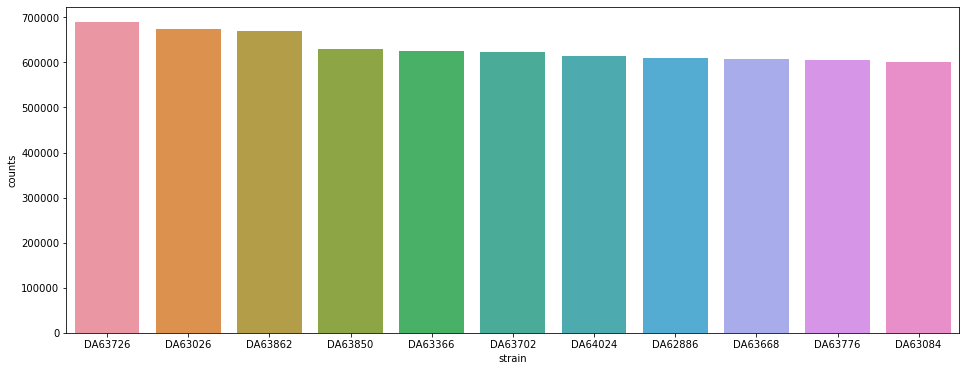

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(16,6))

sns.barplot(x="strain", y="counts", data=nrows_df)


# Repeat length distribution


[None]

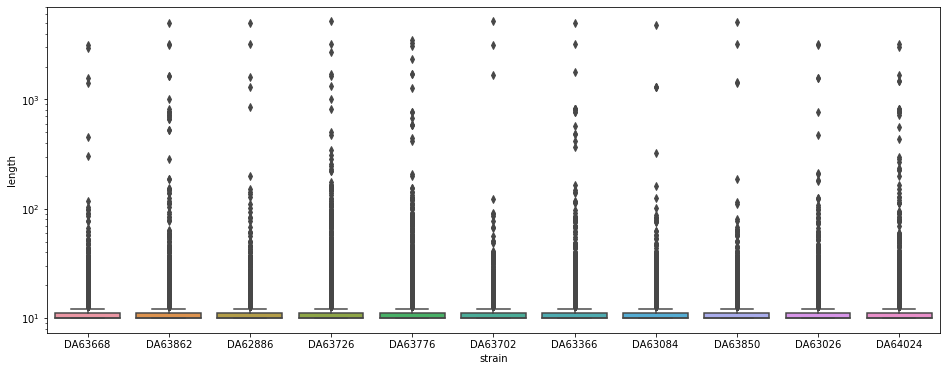

In [20]:
plt.figure(figsize=(16, 6))

bxplt = sns.boxplot(x="strain", y="length", data=grf_results_df)
bxplt.set(yscale="log")

# Test run of GRF for imperfect repeats

As it was planned - max mismatch 10%

`grf-main -i regions.fasta -c 2 -o out_mismatch10 -t 14 --min_tr 10 -f 1 --max_mismatch 10 --seed_mismatch 0 --max_space 205000 --min_space 500`

it gives 1 394 678 lines

In [30]:
mismatch_output = "/home/andrei/Data/HeteroR/test_dir/GRF/DA63366/out_mismatch10/perfect.spacer.id"

mismatch_df = make_repeats_df(mismatch_output, strain_index=7)

mismatch_df

,record_id,start_1,end_1,start_2,end_2,length,strain
0,1,156785,156796,355577,355588,11,DA63366
1,1,155793,155803,354429,354439,10,DA63366
2,1,156991,157004,355523,355536,13,DA63366
3,1,155876,155886,354108,354118,10,DA63366
4,1,157996,158006,355931,355941,10,DA63366
...,...,...,...,...,...,...,...
1394673,2,86562,86574,87116,87128,12,DA63366
1394674,2,67576,67587,68111,68122,11,DA63366
1394675,2,57930,57940,58456,58466,10,DA63366
1394676,2,90519,90534,91034,91049,15,DA63366


In [31]:
mismatch_df.drop_duplicates(inplace=True)
len(mismatch_df)

567249

a lot less without duplicates

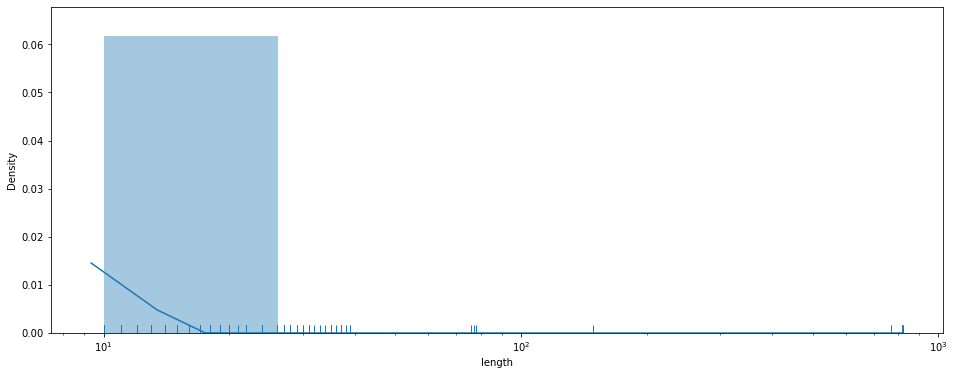

In [ ]:
plt.figure(figsize=(16, 6))

dstrplt = sns.distplot(mismatch_df.length, rug=True, bins=100)
dstrplt.set(xscale="log")